# Convolutional Neural Networks (CNNs)

##  What is a CNN?

A **Convolutional Neural Network (CNN)** is a type of **deep learning** model specially designed for **image recognition and classification tasks**. CNNs are inspired by how the human brain processes visual information.

---

##  Key Components of CNN Architecture

**1.Input Layer**

**2.Convolutional Layers**

**3.Pooling Layers**

**4.Batch Normalization**

**5.Dropout Layer**

**6.Flatten Layer**

**7.Fully Connected (Dense) Layers**


# Import Libraries

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import random

# Load config

In [2]:
with open("cnn_config.json", "r") as f:
    config = json.load(f)

input_dir = config["input_dir"]
model_path = config["output"]["model_path"]
metrics_json = config["output"]["metrics_json"]
acc_loss_plot = config["output"]["accuracy_loss_plot"]
confusion_plot = config["output"]["confusion_matrix_plot"]


# Parameters and Data generators with augmentation

In [3]:
image_size = (128, 128)
batch_size = 32
epochs = 50
patience = 10


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    input_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    input_dir,
    target_size=image_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


num_classes = len(train_gen.class_indices)
class_names = list(train_gen.class_indices.keys())

Found 694 images belonging to 2 classes.
Found 173 images belonging to 2 classes.


# Build improved CNN model

In [4]:
def build_model(input_shape=(128, 128, 1), num_classes=2):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model(input_shape=(128, 128, 1), num_classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model and Save model

In [5]:

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)
    ]
)


model.save(model_path)

c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 4/22 ━━━━━━━━━━━━━━━━━━━━ 1:00 3s/step - accuracy: 0.5169 - loss: 12.4715

c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 146s 6s/step - accuracy: 0.6081 - loss: 10.5773 - val_accuracy: 0.4162 - val_loss: 13.9673
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.6671 - loss: 5.1295 - val_accuracy: 0.4162 - val_loss: 30.9853
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 94s 4s/step - accuracy: 0.6542 - loss: 1.6781 - val_accuracy: 0.4162 - val_loss: 30.1990
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.6888 - loss: 0.8260 - val_accuracy: 0.4162 - val_loss: 33.1623
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.7392 - loss: 0.6378 - val_accuracy: 0.4162 - val_loss: 32.2948
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.7320 - loss: 0.5512 - val_accuracy: 0.4162 - val_loss: 30.7879
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.7450 - loss: 0.5644 - val_accuracy: 0.4162 - val_loss: 26.2117
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.7853 - loss: 0.5119 - val_accuracy: 0.4162 - val_loss:

# Accuracy & Loss Plots and Confusion Matrix

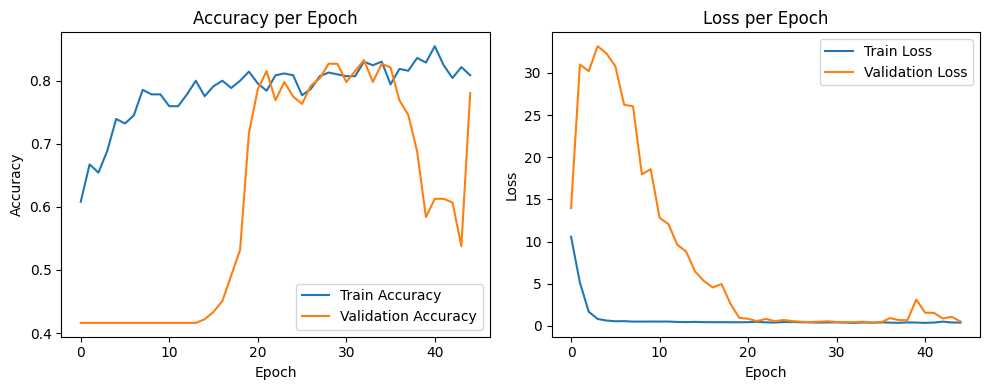

6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


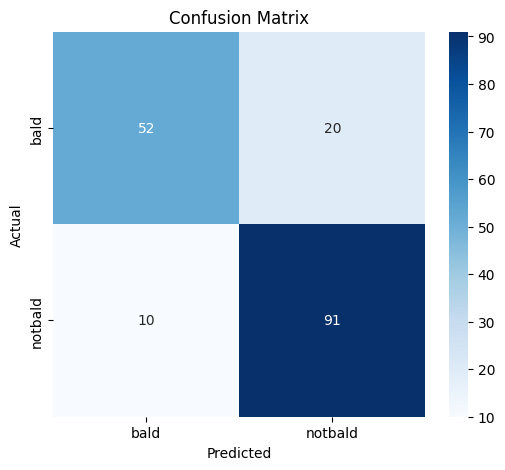

 Training completed. Model and outputs saved with improved architecture.


In [8]:

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()

plt.tight_layout()
plt.savefig(acc_loss_plot)
plt.show()

val_gen.reset()
y_true = val_gen.classes
y_pred = np.argmax(model.predict(val_gen), axis=1)


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(confusion_plot)
plt.show()

report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
final_acc = accuracy_score(y_true, y_pred)

metadata = {
    "final_accuracy": final_acc,
    "classification_report": report,
    "train_accuracy": history.history['accuracy'],
    "val_accuracy": history.history['val_accuracy'],
    "train_loss": history.history['loss'],
    "val_loss": history.history['val_loss']
}

with open(metrics_json, "w") as f:
    json.dump(metadata, f, indent=4)

print(" Training completed. Model and outputs saved with improved architecture.")

# Predict on 30 random images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/ste

Text(0.5, 1.05, 'Predictions on 30 Random Images')

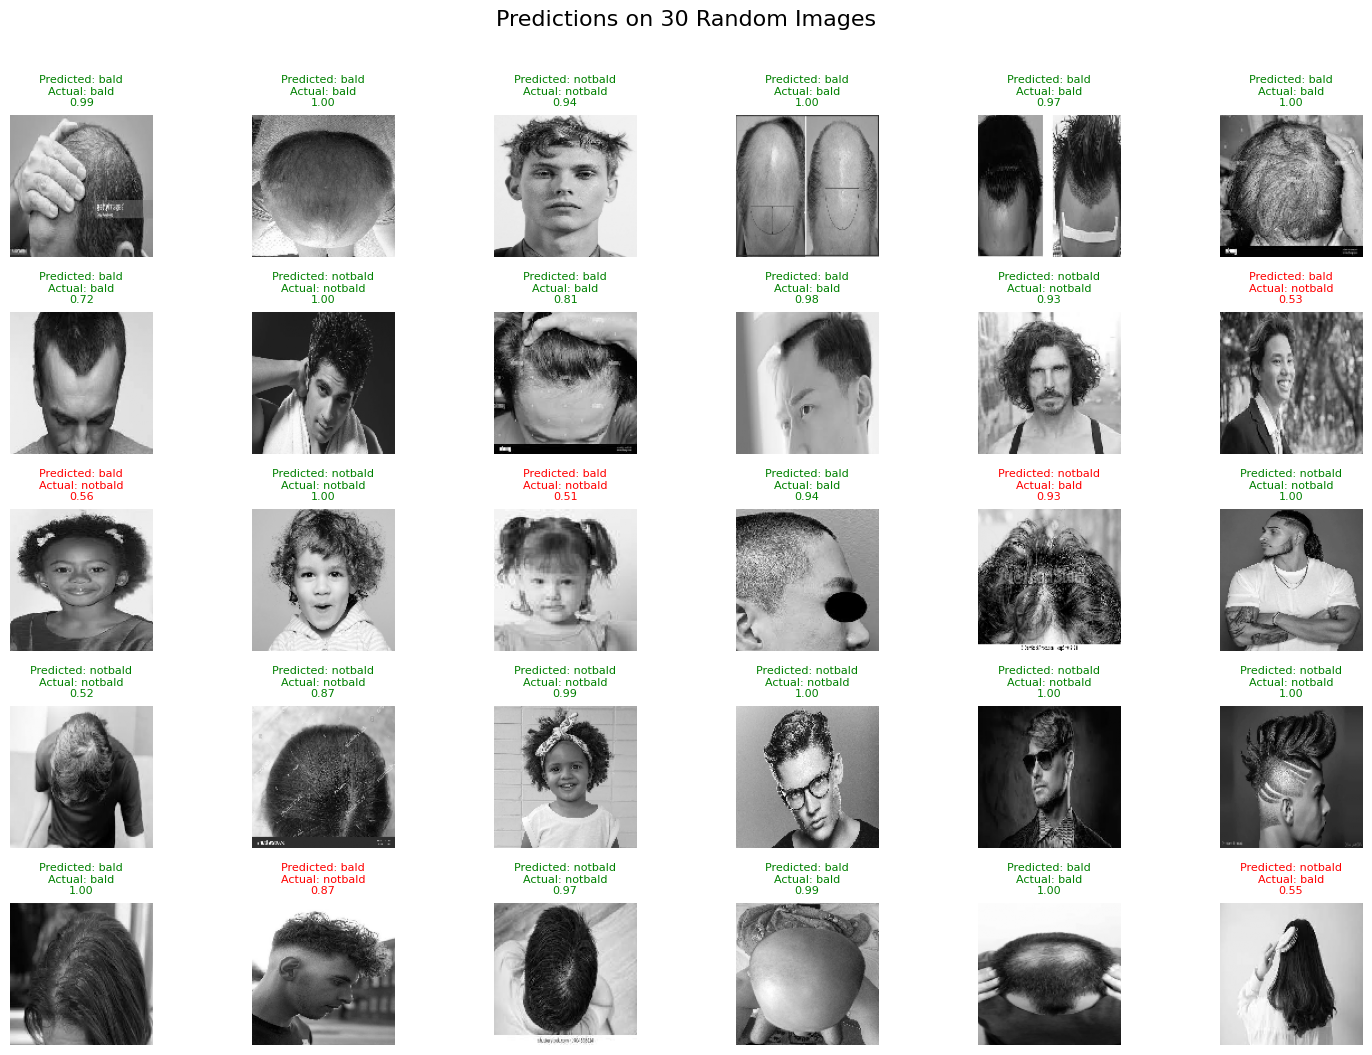

In [9]:
file_paths = []
for class_name in class_names:
    class_folder = os.path.join(input_dir, class_name)
    for fname in os.listdir(class_folder):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_paths.append((os.path.join(class_folder, fname), class_name))

sample_images = random.sample(file_paths, 30)

plt.figure(figsize=(15, 10))
for i, (img_path, true_label) in enumerate(sample_images):
    img = load_img(img_path, color_mode='grayscale', target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    pred_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)

    plt.subplot(5, 6, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {pred_class}\nActual: {true_label}\n{confidence:.2f}",
              fontsize=8, color='green' if pred_class == true_label else 'red')

plt.tight_layout()
plt.suptitle("Predictions on 30 Random Images", fontsize=16, y=1.05)